# Задание №1

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline

## Генерация данных

In [2]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = [(-6.0, 6.0), (-6.0, 6.0)], cluster_std = 3.8, random_state = 42)

## Визуализация данных

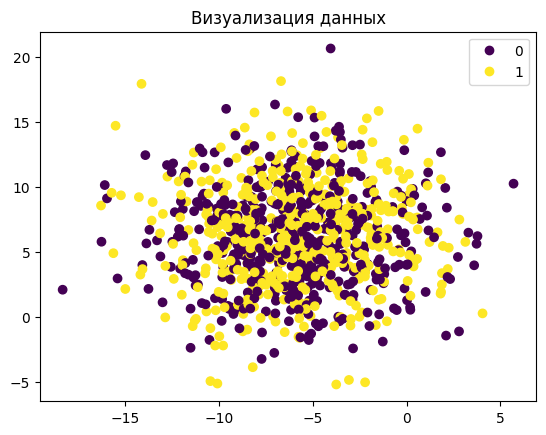

In [3]:
plt.figure()
plt.title("Визуализация данных")
scatter = plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend(*scatter.legend_elements())
plt.show()

## Масштабирование данных

In [4]:
X = StandardScaler().fit_transform(X)

## Разделение данных

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Построение моделей

### Логистическая регрессия

In [6]:
parameters = {"C": [0.1, 1.0, 10.0]}
model = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = parameters, verbose = 2)
model.fit(X_train, y_train)
C_par = model.best_params_["C"]
print("Лучшее значение параметра C: "+str(C_par)+".")
model = LogisticRegression(C = C_par, random_state = 42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)
gini = 2.0*roc_auc_score(y_test, y_proba[:, 1])-1.0
print("Значение коэффициента Джини: "+str(gini)+".")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END .............................................C=10.0; total time=   0.0s
[CV] END ........................................

### Машина опорных векторов

In [7]:
parameters = {"C": [0.1, 1.0, 10.0], "gamma": [0.01, 0.1, 1.0]}
model = GridSearchCV(estimator = SVC(random_state = 42), param_grid = parameters, verbose = 2)
model.fit(X_train, y_train)
C_par = model.best_params_["C"]
gamma_par = model.best_params_["gamma"]
print("Лучшее значение параметра C: "+str(C_par)+".")
print("Лучшее значение параметра gamma: "+str(gamma_par)+".")
model = SVC(C = C_par, gamma = gamma_par, probability = True, random_state = 42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)
gini = 2.0*roc_auc_score(y_test, y_proba[:, 1])-1.0
print("Значение коэффициента Джини: "+str(gini)+".")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.0; total time=   0.0s
[CV] END ...................................C=0.1

### Дерево решений

In [8]:
parameters = {"max_depth": [5, 10, 20], "min_samples_split": [2, 5, 10]}
model = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), param_grid = parameters, verbose = 2)
model.fit(X_train, y_train)
max_depth_par = model.best_params_["max_depth"]
min_samples_split_par = model.best_params_["min_samples_split"]
print("Лучшее значение параметра max_depth: "+str(max_depth_par)+".")
print("Лучшее значение параметра min_samples_split: "+str(min_samples_split_par)+".")
model = DecisionTreeClassifier(max_depth = max_depth_par, min_samples_split = min_samples_split_par, random_state = 42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)
gini = 2.0*roc_auc_score(y_test, y_proba[:, 1])-1.0
print("Значение коэффициента Джини: "+str(gini)+".")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_sampl

### Случайный лес

In [9]:
parameters = {"n_estimators": [10, 50, 100], "max_depth": [5, 10, 20]}
model = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = parameters, verbose = 2)
model.fit(X_train, y_train)
n_estimators_par = model.best_params_["n_estimators"]
max_depth_par = model.best_params_["max_depth"]
print("Лучшее значение параметра n_estimators: "+str(n_estimators_par)+".")
print("Лучшее значение параметра max_depth: "+str(max_depth_par)+".")
model = RandomForestClassifier(n_estimators = n_estimators_par, max_depth = max_depth_par, random_state = 42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)
gini = 2.0*roc_auc_score(y_test, y_proba[:, 1])-1.0
print("Значение коэффициента Джини: "+str(gini)+".")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_est